<a href="https://colab.research.google.com/github/jbuzzio/DeepLearning/blob/main/02_preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gdown

# Descarga y descompresion del dataset que se encuentra en google drive

In [2]:
file_id = "1R2Za2aHaGTyoc0lbmPb0TxjFRQ4TgO0Y" #ID del archivo en google drive
destination = "cicids2017_dataset"

# Descargar el archivo
!gdown --id "$file_id" -O "$destination"

# Descomprimir el archivo
!unzip -q "$destination" -d "/content"
!rm cicids2017_dataset

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1R2Za2aHaGTyoc0lbmPb0TxjFRQ4TgO0Y
From (redirected): https://drive.google.com/uc?id=1R2Za2aHaGTyoc0lbmPb0TxjFRQ4TgO0Y&confirm=t&uuid=f29ba327-f0e5-4e4b-b69c-4a4a4ec490cb
To: /content/cicids2017_dataset
100% 31.2M/31.2M [00:00<00:00, 97.1MB/s]


In [3]:
import os
import numpy as np
import sklearn.preprocessing as skpp
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Cargar el dataset


In [10]:
dataset = np.load("/content/cicids2017_dataset.npz")
X = dataset['X']
y = dataset['y']

In [11]:
labels = pd.DataFrame(y, columns=['label'])
labels['label'].unique()

array(['benign', 'ddos', 'dos', 'PortScan'], dtype=object)

# Submuestro de los datos

Dado que en el notebook anterior vimos que los datos estan muy desbalanceados. Es necesario que hagamos un balanceo de los datos a fin de evitar algun sesgo para con las clases mayoritarias al momento de la clasificación.

In [12]:
# Lista para almacenar los datos balanceados
balanced_data = []

# Número de muestras objetivo para la clase 'benign'
target_samples = 3000  # Valor para benign

for label in labels['label'].unique():
    # Filtrar las imágenes y etiquetas correspondientes a la clase
    class_indices = labels[labels['label'] == label].index  # Índices de la clase
    class_images = X[class_indices]  # Imágenes de la clase
    class_labels = labels.loc[class_indices]  # Etiquetas de la clase

    if label == 'benign':
        # Submuestrear la clase 'benign' a `target_samples`
        balanced_images, balanced_labels = resample(
            class_images,
            class_labels,
            replace=False,  # No duplicar
            n_samples=target_samples,  # Submuestreo a 3000
            random_state=42
        )
    else:
        # Mantener las demás clases constantes
        balanced_images = class_images
        balanced_labels = class_labels

    # Añadir los datos balanceados o constantes a la lista
    balanced_data.append((balanced_images, balanced_labels))

# Concatenar todas las clases
balanced_images = np.concatenate([data[0] for data in balanced_data], axis=0)
balanced_labels = pd.concat([data[1] for data in balanced_data], axis=0)

# Mostrar la forma de las imágenes balanceadas y las etiquetas
print(f'Imágenes balanceadas: {balanced_images.shape}')
print(f'Etiquetas balanceadas: {balanced_labels.shape}')

Imágenes balanceadas: (5991, 60, 60, 3)
Etiquetas balanceadas: (5991, 1)


Ploteamos nuevamente las clases

In [15]:
distribucion_clases= {}
for i in labels['label'].unique():
  distribucion_clases[i] =len(balanced_labels[balanced_labels['label'] == i])
print(distribucion_clases)

{'benign': 3000, 'ddos': 711, 'dos': 1398, 'PortScan': 882}


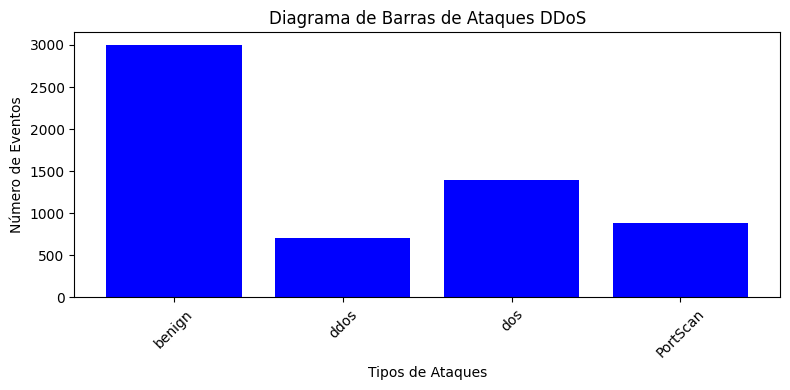

In [14]:
plt.figure(figsize=(8, 4))
plt.bar(distribucion_clases.keys(),distribucion_clases.values(), color='blue')
plt.title('Diagrama de Barras de Ataques DDoS')
plt.xlabel('Tipos de Ataques')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Guardamos este dataset submuestrado para utilizarlo en la arquitectura

In [16]:
np.savez("/content/cicids2017_balanceado", X=balanced_images, y=balanced_labels)